# Intermolecular salt-bridges

In [25]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import csv
import os
import warnings
warnings.filterwarnings('ignore')

input_files = os.path.join('DNMT3B_inputs')

#Define the DNA sequence motif here (CGC, CGG, CGT or CGA)
typ="CGG"

sb=pd.read_csv(input_files+"/3B-"+typ+".int.ionics", sep="\t", header=None)
sb.columns = ["itype", "chain_a", "chain_b", "resname_a", "resname_b", "resid_a", "resid_b","atom_a", "atom_b" ]

sb['resid_a'] = sb['resid_a'] + 570

sb_inter = sb.loc[((sb["chain_a"] == "A") & (sb["chain_b"] == "B")) | 
                    ((sb["chain_a"] == "A") & (sb["chain_b"] == "C")) ]

sb_inter["resname_a"] = sb_inter["resname_a"].astype(str) + sb_inter["resid_a"].astype(str)
sb_inter["resname_b"] = sb_inter["resname_b"].str[1]

#
sb_inter=sb_inter.drop(columns=['resid_a'])
sb_inter['Type'] = "3B:"+typ
#
sb_inter

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type
9,ionic,A,C,ARG733,C,298,NH1,OP1,3B:CGG
14,ionic,A,C,LYS770,T,296,NZ,OP1,3B:CGG
15,ionic,A,B,LYS782,A,286,NZ,OP2,3B:CGG
17,ionic,A,B,ARG823,G,285,NE,OP2,3B:CGG
30,ionic,A,C,ARG733,C,298,NH1,OP1,3B:CGG
...,...,...,...,...,...,...,...,...,...
59380,ionic,A,B,LYS782,A,286,NZ,O5',3B:CGG
59392,ionic,A,C,ARG733,C,298,NH1,OP2,3B:CGG
59396,ionic,A,B,LYS782,A,286,NZ,O5',3B:CGG
59410,ionic,A,C,ARG733,C,298,NH1,OP2,3B:CGG


In [26]:
#Function for convert residue number of nucleotides to nucleotide position
def nucleotide_pos(df):
    df['resid_b'] = df['resid_b'].astype(str).str.replace('284',"(+5')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('285',"(+4')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('286',"(+3')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('287',"(+2')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('288',"(+1')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('289',"(0')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('290',"(-1')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('291',"(-2')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('292',"(-3')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('293',"(-4')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('294',"(-4)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('295',"(-3)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('296',"(-2)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('297',"(-1)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('298',"(0)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('299',"(+1)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('300',"(+2)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('301',"(+3)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('302',"(+4)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('303',"(+5)")


In [27]:
nucleotide_pos(sb_inter)

sb_inter["resname_b"] = sb_inter["resname_b"].astype(str) + sb_inter["resid_b"].astype(str)
sb_inter=sb_inter.drop(columns=['resid_b'])

sb_inter

,itype,chain_a,chain_b,resname_a,resname_b,atom_a,atom_b,Type
9,ionic,A,C,ARG733,C(0),NH1,OP1,3B:CGG
14,ionic,A,C,LYS770,T(-2),NZ,OP1,3B:CGG
15,ionic,A,B,LYS782,A(+3'),NZ,OP2,3B:CGG
17,ionic,A,B,ARG823,G(+4'),NE,OP2,3B:CGG
30,ionic,A,C,ARG733,C(0),NH1,OP1,3B:CGG
...,...,...,...,...,...,...,...,...
59380,ionic,A,B,LYS782,A(+3'),NZ,O5',3B:CGG
59392,ionic,A,C,ARG733,C(0),NH1,OP2,3B:CGG
59396,ionic,A,B,LYS782,A(+3'),NZ,O5',3B:CGG
59410,ionic,A,C,ARG733,C(0),NH1,OP2,3B:CGG


In [28]:
sb_inter['resname_a'] = sb_inter['resname_a'].str.title()

#discarding flipped cytosine
sb_inter=sb_inter.drop(sb_inter.loc[sb_inter['resname_b']=="C(0)"].index)
#
sb_inter['pairwise'] = sb_inter['resname_a'].str.cat(sb_inter['resname_b'],sep="-")
sb_inter['pair_freq'] = sb_inter.groupby('pairwise')['pairwise'].transform('count')
#
sb_inter=sb_inter.sort_values(('pair_freq'), ascending=False)

sb_inter


,itype,chain_a,chain_b,resname_a,resname_b,atom_a,atom_b,Type,pairwise,pair_freq
59414,ionic,A,B,Lys782,A(+3'),NZ,O5',3B:CGG,Lys782-A(+3'),2666
23726,ionic,A,B,Lys782,A(+3'),NZ,OP2,3B:CGG,Lys782-A(+3'),2666
23466,ionic,A,B,Lys782,A(+3'),NZ,OP2,3B:CGG,Lys782-A(+3'),2666
23482,ionic,A,B,Lys782,A(+3'),NZ,OP2,3B:CGG,Lys782-A(+3'),2666
23498,ionic,A,B,Lys782,A(+3'),NZ,OP2,3B:CGG,Lys782-A(+3'),2666
...,...,...,...,...,...,...,...,...,...,...
55675,ionic,A,B,Lys782,C(+2'),NZ,OP2,3B:CGG,Lys782-C(+2'),3
5833,ionic,A,B,Lys785,C(+1'),NZ,OP2,3B:CGG,Lys785-C(+1'),3
29333,ionic,A,B,Lys785,C(+1'),NZ,OP2,3B:CGG,Lys785-C(+1'),3
46653,ionic,A,B,Lys782,C(+2'),NZ,OP2,3B:CGG,Lys782-C(+2'),3


In [29]:
sb_sig = sb_inter[sb_inter['pair_freq'] > (3204*0.1)]

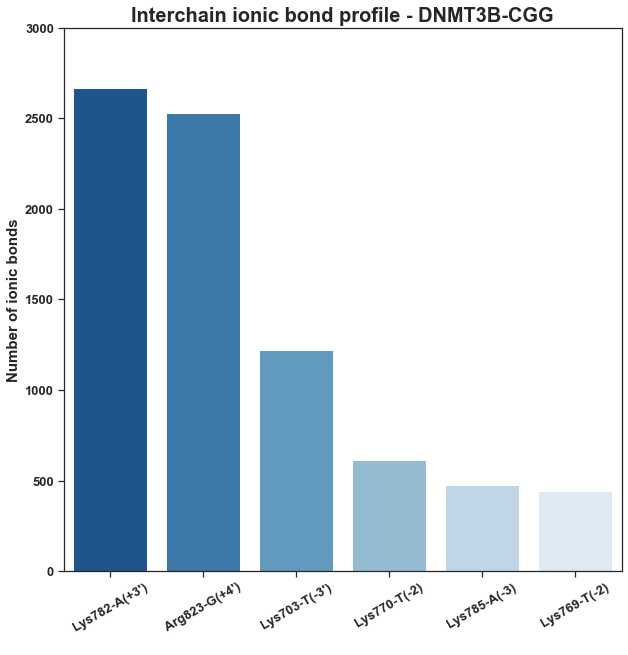

In [30]:
sns.set(style="ticks")
plt.figure(figsize=(10,10))

ax = sns.barplot(x="pairwise", y="pair_freq", palette="Blues_r", data=sb_sig)
plt.xticks(rotation=30)
plt.xticks(fontsize=13, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
plt.ylim(ymax = 3000, ymin = 0)
plt.xlabel(' ')
plt.ylabel('Number of ionic bonds',fontsize=15, fontweight='bold')
plt.title("Interchain ionic bond profile - DNMT3B-"+typ,fontsize=20, fontweight='bold')

plt.savefig("3B-"+typ+"-ionic-pairwise.png", dpi=600, bbox_inches='tight', format="png")